Szymon Rogowski (405244)
Projekt

Nr:5. Dany jest obraz kolorowy zawierający obiekty o różnej jasności,
za pomocą operacji morfologicznej dylatacji i erozji znajdź na obrazie krawędzie obiektów.
Zmierz długości krawędzi obiektów a wynik przedstaw w postaci histogramu.

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import math
from skimage import io, color
from skimage.filters import threshold_otsu, sobel
from skimage.morphology import binary_dilation, binary_erosion, disk, skeletonize
from skimage.measure import find_contours
from scipy.ndimage import gaussian_filter

print("Libs loaded.")

Libs loaded.


In [34]:
lena_image = io.imread('images/lena.png')

In [35]:
def luminance_histogram(image, name):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    plt.hist(gray_image.ravel(), bins=256, color='gray', alpha=0.7)
    plt.title(f'Histogram Jasności - {name}')
    plt.xlabel('Wartość Jasności')
    plt.ylabel('Liczba Pikseli')
    plt.show()

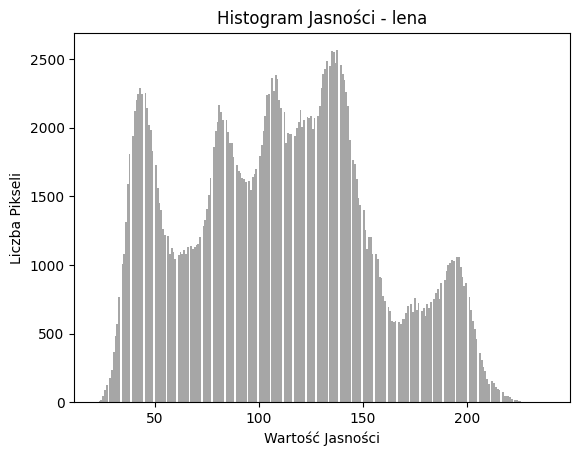

In [36]:
luminance_histogram(lena_image, "lena")

In [31]:
# gray_image = color.rgb2gray(image)
#
# edges = sobel(gray_image)
#
# plt.subplot(1, 2, 1)
# plt.imshow(gray_image, cmap='gray')
# plt.title('Obraz Oryginalny')
#
# plt.subplot(1, 2, 2)
# plt.imshow(edges, cmap='gray')
# plt.title('Detekcja Krawędzi')
#
# plt.show()

In [37]:
def edge_detection(image):
    gray_image = color.rgb2gray(image)
    # Binaryzacja Otsu do podziału obrazu na obszary białe i czarne. Binaryzacja pomaga w późniejszych operacjach morfologicznych, ponieważ te operacje są zwykle stosowane na obrazach binarnych, gdzie piksele są przypisane do jednej z dwóch wartości (czarny - biały).
    threshold_value = threshold_otsu(gray_image)
    binary_image = gray_image > threshold_value

    # Element strukturalny (maska operacji morfologicznych) w kształcie dysku o promieniu 3 pikseli. Następnie przeprowadzane są operacje dylatacji i erozji na obrazie binarnym.
    selem = disk(3)
    dilated_image = binary_dilation(binary_image, selem)
    eroded_image = binary_erosion(binary_image, selem)

    # Operacja XOR jest używana, ponieważ różnicuje obszary, gdzie jedno z dwóch działań morfologicznych (dylatacji, erozji) miało wpływ. Różnicowanie jest używane do wskazania obszarów, gdzie zachodzi zmiana intensywności pikseli.
    # XOR zwraca prawdę (1), gdy jedno z dwóch porównywanych pikseli jest prawdą (1), a drugie fałszem (0).
    #     Po zastosowaniu operacji dylatacji na obrazie binarnym, obszary obiektów są poszerzane.
    #     Po zastosowaniu operacji erozji, obszary obiektów są zwężane.
    #  XOR między obrazem po dylatacji a obrazem po erozji zwraca wartość prawdy (1) dla pikseli, które różnią się między tymi dwoma obrazami.
    # Piksele, które są wspólne dla obu obrazów, są oznaczone jako fałsz (0).
    # Piksele, które różnią się między obrazem po dylatacji a obrazem po erozji, odpowiadają obszarom, gdzie operacje morfologiczne miały wpływ na strukturę obiektów - obszary krawędzi.
    # Wynik edges to mapa binarna, gdzie wartości 1 wskazują obszary krawędzi, a wartości 0 wskazują obszary wewnątrz obiektów.
    edges = dilated_image ^ eroded_image


    # Wartość jest interpretowana jako stosunek wysokości konturu do szerokości - 0.8 => 80% - mogą wynikać z szumów na obrazie.
    # Algorytm używany w funkcji wedle dokumentacji: marching squares method zastosowany na mapie binarnej krawędzi, który polega na:
    # 1. Podział obrazu na kwadraty:
    #     - Obraz dzielony jest na kwadraty o rozmiarze 2x2 piksele.
    #     - Każdy kwadrat reprezentuje lokalny fragment obrazu.
    # 2. Przypisanie wartości binarnej do wierzchołków kwadratu:
    #     - Każdemu z czterech wierzchołków kwadratu przypisuje się wartość binarną (0 lub 1) w zależności od tego, czy piksel znajdujący się w tym punkcie należy do obszaru o intensywności większej czy mniejszej od progu.
    # 3. Konfiguracja kwadratu...
    contours = find_contours(edges, 0.8)

    # Wynikiem poprzedniej operacji jest lista konturów, gdzie każdy kontur jest tablicą 2D, a każda kolumna zawiera współrzędne y i x punktów konturu.
    edge_lengths = [len(contour) for contour in contours]
    # Szkieletyzacja
    plt.subplot(2, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Obraz Oryginalny')

    plt.subplot(2, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Detekcja Krawędzi')

    plt.subplot(2, 1, 2)
    plt.hist(edge_lengths, bins=50, color='red', alpha=0.7)
    plt.title('Histogram Długości Krawędzi')
    plt.xlabel('Długość Krawędzi')
    plt.ylabel('Liczba Krawędzi')

    plt.show()

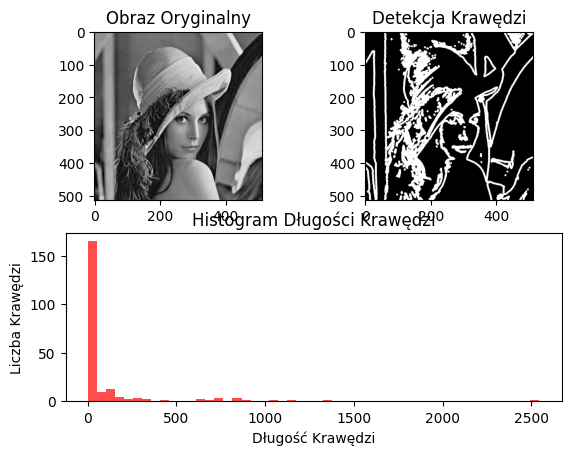

In [38]:
edge_detection(lena_image)